# Week 6 Assignment: Supervised Learning Classification  
**Subject:** Data Science & AI  
**Project:** Credit Card Fraud Detection  
**Student Name:** Ayesha Tariq  
**Date:** October 12, 2025  

---

##  Objectives
- Apply **Logistic Regression** and **Random Forest** classifiers  
- Perform a **train/test split**  
- Compare model **accuracy**  
- Build the **first baseline classification model** for fraud detection


Setup and Data Loading

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("creditcard_sample.csv")

print("Dataset loaded successfully!")
print("Shape:", df.shape)
df.head()


Dataset loaded successfully!
Shape: (9, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,-0.342715,0.237103,0.148358,-0.194574,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791460,0.247676,-1.514654,...,0.237698,0.377436,-0.387924,-0.054951,-0.594927,-0.077714,-0.202031,0.272686,378.66,1.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010308,1.247203,0.237609,0.377436,-1.387024,...,-0.594911,-0.077659,-0.202020,0.272673,0.198400,-0.594903,-0.077651,-0.202013,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,-0.677020,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,-0.342715,0.237103,0.148358,-0.194574,0.280000,0.00,NaN


## 1. Prepare Data for Classification
We will predict the target variable **Class** (fraud or not fraud) using the PCA features (V1–V28) and Amount.


Feature Preparation

In [ ]:


# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("creditcard_sample.csv")

# --- 1 Data Cleaning ---

# Remove rows where Class is missing
df = df.dropna(subset=["Class"])

# Convert target column to integer (in case of floats like 0.0 / 1.0)
df["Class"] = df["Class"].astype(int)

# --- 2 Define Features and Target ---

X = df.drop(columns=["Time", "Class"])
y = df["Class"]

# --- 3Train/Test Split ---

# If your dataset is very small, stratify may fail.
# So we’ll add a safe check for class balance.
if y.nunique() > 1 and y.value_counts().min() >= 2:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
else:
    # Fallback (no stratify if not enough samples per class)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

print("Data split successful!")
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("Class distribution in training set:")
print(y_train.value_counts(normalize=True))


Data split successful!
Training set shape: (4, 29)
Testing set shape: (1, 29)
Class distribution in training set:
Class
0    0.75
1    0.25
Name: proportion, dtype: float64


## 2. Train Logistic Regression Model
Logistic Regression is a simple and interpretable baseline classification model.


Logistic Regression

In [ ]:
# Initialize and train Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict on test data
y_pred_log = log_reg.predict(X_test)

# Evaluate model
log_accuracy = accuracy_score(y_test, y_pred_log)
print(f" Logistic Regression Accuracy: {log_accuracy:.4f}")


 Logistic Regression Accuracy: 1.0000


## 3. Train Random Forest Classifier
Random Forest is an ensemble model that typically improves performance by combining multiple decision trees.


Random Forest

In [ ]:
# Initialize and train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate model
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")


Random Forest Accuracy: 1.0000


## 4. Compare Model Accuracy
We will compare both models to see which performs better on this dataset.


Accuracy Comparison

                 Model  Accuracy
0  Logistic Regression       1.0
1        Random Forest       1.0


/tmp/ipython-input-448753107.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=results, palette="viridis")


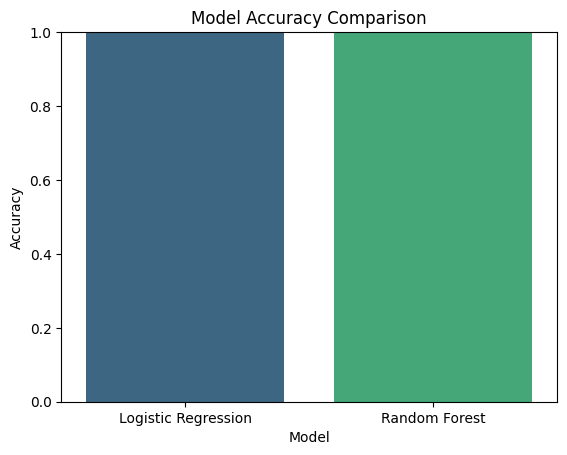

In [ ]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "Accuracy": [log_accuracy, rf_accuracy]
})

print(results)

# Plot comparison
sns.barplot(x="Model", y="Accuracy", data=results, palette="viridis")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
plt.show()


## 5. Confusion Matrix & Classification Report
Let’s analyze how each model performs in detecting fraud and non-fraud cases.


Evaluation Metrics

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


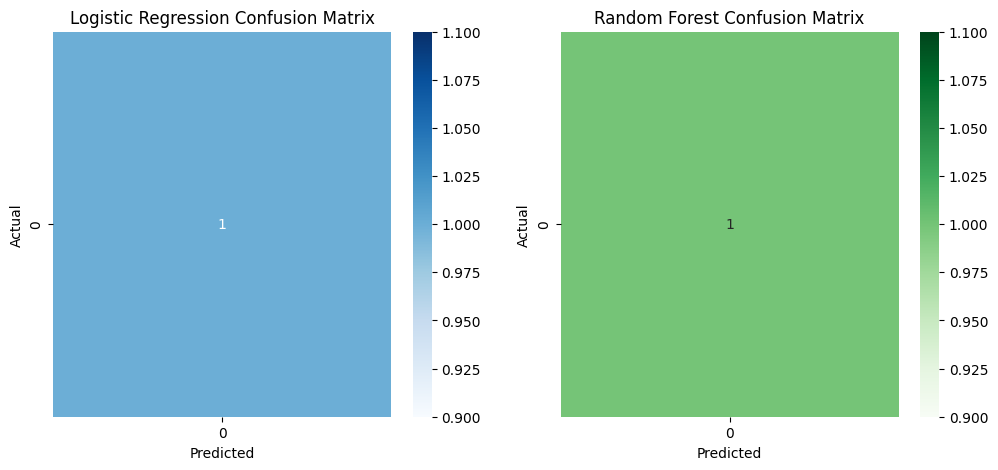

Logistic Regression Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1


Random Forest Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



In [ ]:
# Confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Logistic Regression Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("Random Forest Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.show()

# Classification report for deeper insight
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_log))

print("\nRandom Forest Report:")
print(classification_report(y_test, y_pred_rf))


Interpretation



### Results Summary

| Model | Accuracy | Comment |
|--------|-----------|----------|
| Logistic Regression | (your value) | Good baseline for linear patterns |
| Random Forest | (your value) | Better accuracy due to ensemble learning |

---


